In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tải dữ liệu từ file CSV (Ví dụ, bạn cần tải dataset Kaggle)
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')  

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Kiểm tra các cột có Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing_columns = df.columns[df.isnull().any()]
print("Các cột có missing value:")
print(missing_columns)

Các cột có missing value:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Phân tích dữ liệu bị thiếu

In [6]:
# Phân tích dữ liệu bị thiếu
missing_data =df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

print(missing_df)


              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


Tỷ lệ dữ liệu thiếu lớn hơn 80% thì loại bỏ cột 

In [7]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=cols_to_drop, inplace=True)

     

Liệt kê lại các cột có giá trị thiếu

In [8]:
# Liệt kê các cột có giá trị thiếu
missing_columns = df.columns[df.isnull().sum() > 0]
print(f"Các cột còn dữ liệu thiếu: {missing_columns.tolist()}")

Các cột còn dữ liệu thiếu: ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


Xử lý dữ liệu bị thiếu ở các cột

In [9]:
miss_df = df[missing_columns]
miss_df

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


In [10]:
# Tách các cột dạng số và dạng phân loại
numeric_cols = miss_df.select_dtypes(include=['number'])
categorical_cols = miss_df.select_dtypes(include=['object', 'category'])

# Lưu vào DataFrame mới
missnum_df = numeric_cols.copy()  # Sao chép cột dạng số
misscat_df = categorical_cols.copy()  # Sao chép cột dạng phân loại

In [11]:
missnum_df.head(100)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
95,NaN,68.0,1993.0
96,78.0,183.0,1999.0
97,73.0,48.0,1965.0
98,85.0,0.0,1920.0


In [12]:
median_values = numeric_cols.median()
median_values

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

In [13]:
# Cột kiểu chuỗi (categorical) - điền bằng 'None'
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)

# Cột số - điền bằng median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

# Điền cột Electrical = mode vì chỉ thiếu 1
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


/tmp/ipykernel_31/3659947645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace=True)
/tmp/ipykernel_31/3659947645.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Kiểm tra lại

In [14]:
print("Số lượng missing value còn lại:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Số lượng missing value còn lại:
Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [15]:
# Kiểm tra các giá trị thiếu trong tập dữ liệu chưa xử lý
missing_values = df.isnull().sum()

# In ra các cột có giá trị thiếu và số lượng giá trị thiếu trong mỗi cột
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [16]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Liệt kê các cột có Outlier

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#if 'Id' in numeric_cols:
    #numeric_cols.remove('Id')
numeric_cols    

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
len(numeric_cols )

38

In [19]:
num_df = df[numeric_cols]

In [20]:

# In số giá trị duy nhất cho từng cột
unique_counts = {col: num_df[col].nunique() for col in numeric_cols}
unique_counts

{'Id': 1460,
 'MSSubClass': 15,
 'LotFrontage': 110,
 'LotArea': 1073,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'MasVnrArea': 327,
 'BsmtFinSF1': 637,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'TotRmsAbvGrd': 12,
 'Fireplaces': 4,
 'GarageYrBlt': 97,
 'GarageCars': 5,
 'GarageArea': 441,
 'WoodDeckSF': 274,
 'OpenPorchSF': 202,
 'EnclosedPorch': 120,
 '3SsnPorch': 20,
 'ScreenPorch': 76,
 'PoolArea': 8,
 'MiscVal': 21,
 'MoSold': 12,
 'YrSold': 5,
 'SalePrice': 663}

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


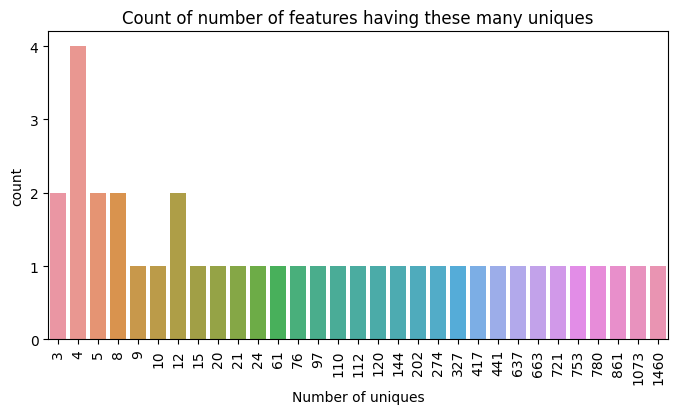

In [21]:
plt.figure(figsize=(8, 4))
plt.xlabel('Number of uniques')
plt.xticks(rotation=90)
plt.yticks(range(0, 5))  # Có thể điều chỉnh theo số lượng giá trị duy nhất mà bạn dự kiến
plt.title('Count of number of features having these many uniques')

# Vẽ biểu đồ
sns.countplot(x=list(unique_counts.values()))
plt.show()

In [22]:

# Lựa ra các cột có số lượng giá trị duy nhất bé hơn 12
columns_with_few_uniques = [col for col, count in unique_counts.items() if count <= 12]

# In ra danh sách các cột
len(columns_with_few_uniques)

14

In [23]:
columns_with_many_uniques = [col for col, count in unique_counts.items() if count > 12]
columns_with_many_uniques

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [24]:
# Đếm và hiển thị số lượng cột có nhiều giá trị duy nhất
print("Số lượng cột có nhiều giá trị duy nhất:", len(columns_with_many_uniques))

# Đếm và hiển thị số lượng cột có ít giá trị duy nhất
print("Số lượng cột có ít giá trị duy nhất:", len(columns_with_few_uniques))

Số lượng cột có nhiều giá trị duy nhất: 24
Số lượng cột có ít giá trị duy nhất: 14


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

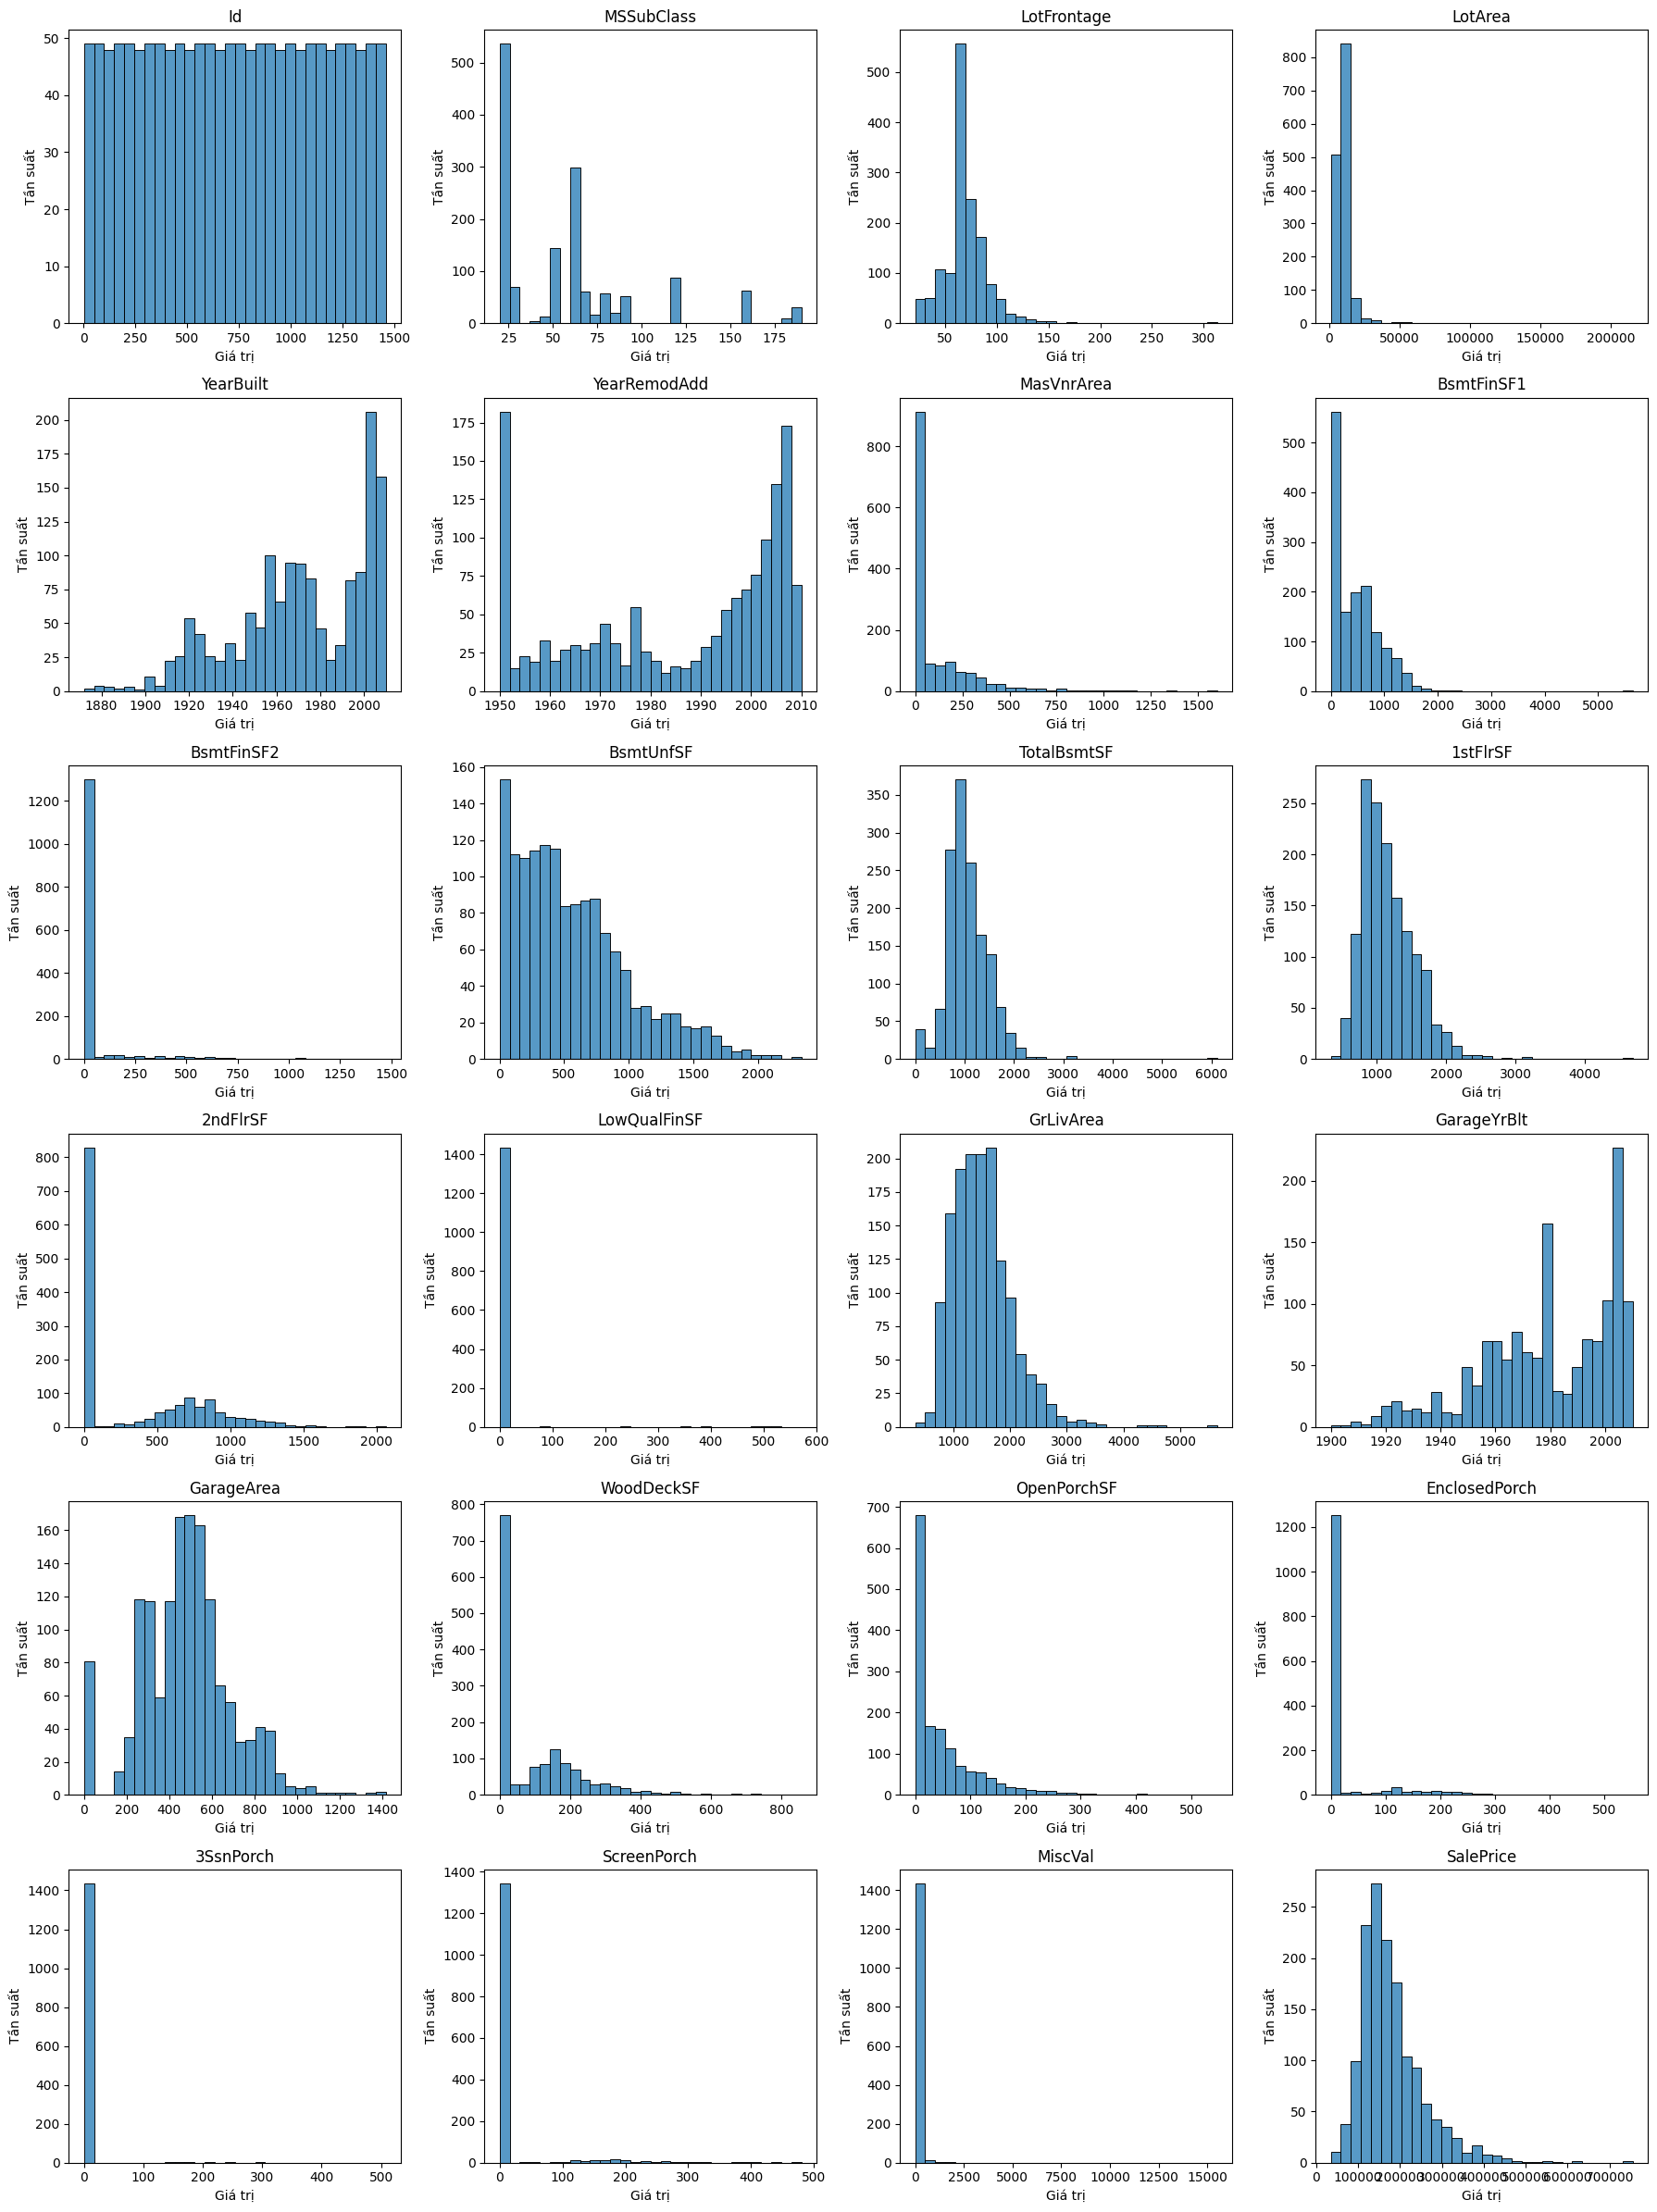

In [25]:
# Vẽ biểu đồ phân phối cho từng cột trong numeric_cols
many_uniq_cols = len(columns_with_many_uniques)
cols_per_row = 4  # Số cột trong mỗi hàng
rows = (many_uniq_cols // cols_per_row) + (many_uniq_cols % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
# Lưu hình ảnh vào file
plt.savefig('distribution_plots.png')  # Đặt tên và định dạng file
plt.show()

In [26]:
skewed_num_features = ['ScreenPorch', 'LowQualFinSF', '3SsnPorch',
                       'BsmtFinSF2', 'MiscVal', 'EnclosedPorch']
# Lấy các cột nhiều giá trị duy nhất trừ đi các cột có độ lệch
columns_with_many_uniques = [col for col in columns_with_many_uniques if col not in skewed_num_features]

# In ra danh sách các cột đã lọc
print("Cột có nhiều giá trị duy nhất (đã loại bỏ các cột có độ lệch cao):")
columns_with_many_uniques


Cột có nhiều giá trị duy nhất (đã loại bỏ các cột có độ lệch cao):


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

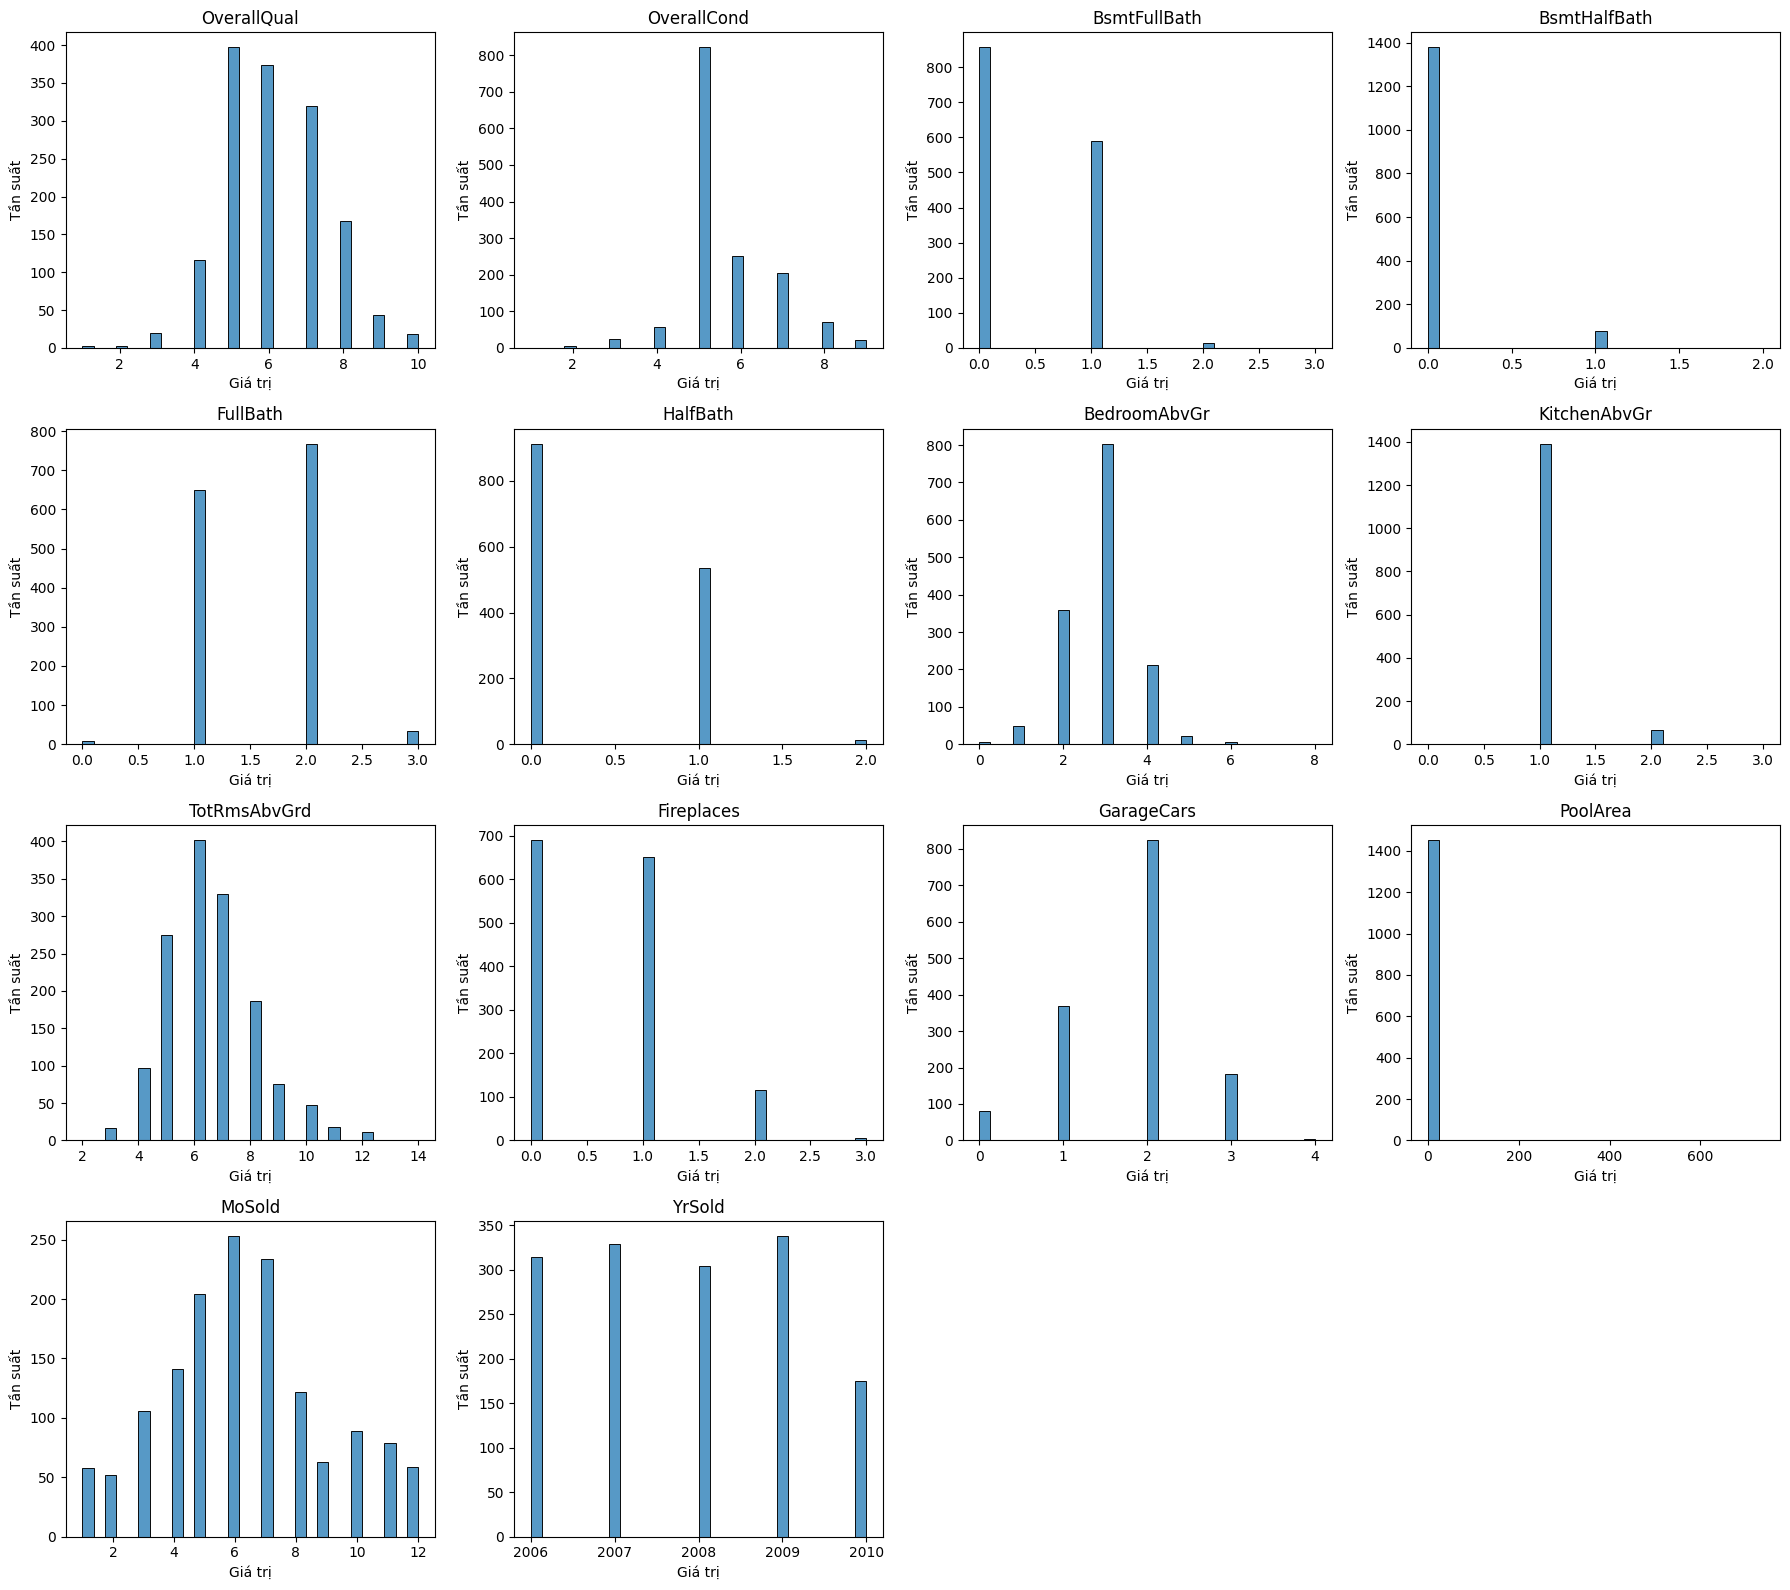

In [27]:
# Vẽ biểu đồ phân phối cho từng cột trong numeric_cols
few_uniq_cols = len(columns_with_few_uniques)
cols_per_row = 4  # Số cột trong mỗi hàng
rows = (few_uniq_cols // cols_per_row) + (few_uniq_cols % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_few_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.savefig('distribution_plots1.png')  # Đặt tên và định dạng file
plt.show()

In [28]:
# 'PoolArea' cũng lệch
columns_with_few_uniques.remove('PoolArea')

In [29]:
#Remove cột SalePrice
columns_with_many_uniques.remove('SalePrice')

In [30]:
len(columns_with_many_uniques)

17

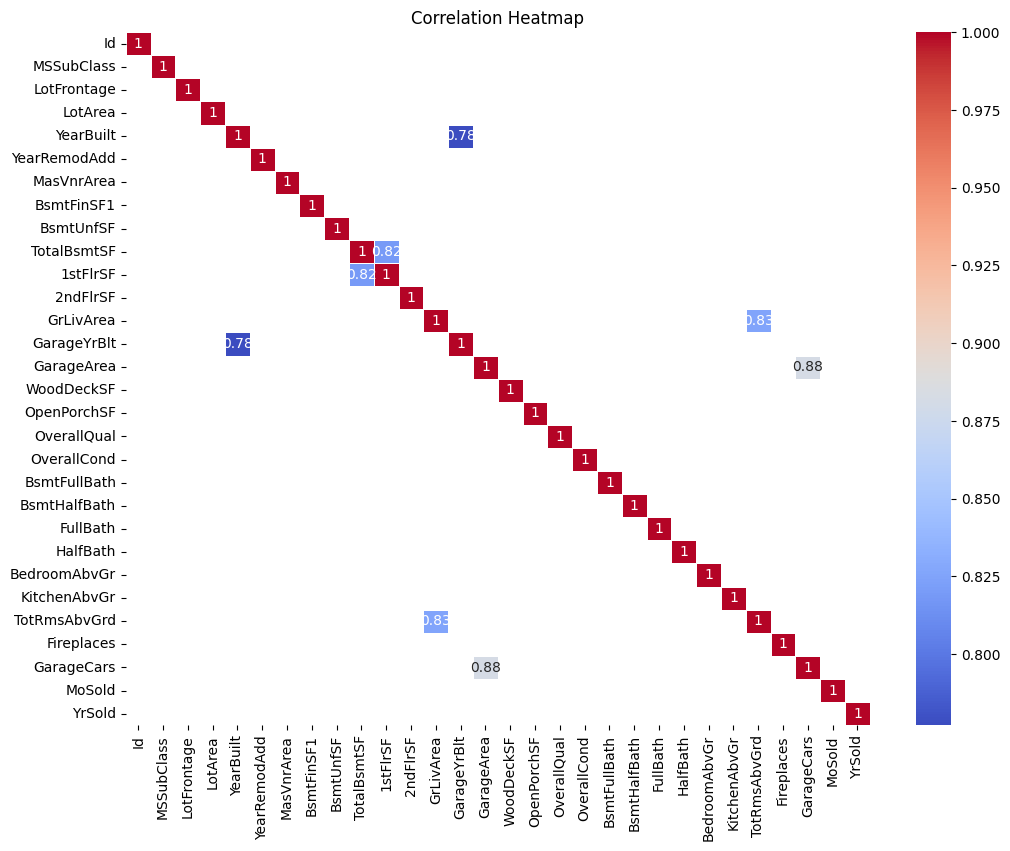

Cặp giá trị tương quan cao:
1stFlrSF and TotalBsmtSF: 0.82
GarageYrBlt and YearBuilt: 0.78
TotRmsAbvGrd and GrLivArea: 0.83
GarageCars and GarageArea: 0.88


In [31]:
# Tính toán ma trận tương quan

corr_matrix = num_df[columns_with_many_uniques + columns_with_few_uniques].corr()

# Vẽ biểu đồ nhiệt độ
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, mask=corr_matrix < 0.7, linewidth=0.5, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation.png')  # Đặt tên và định dạng file
plt.show()

# In ra các cặp giá trị tương quan cao
high_corr_pairs = []

# Lặp qua ma trận tương quan để tìm các cặp tương quan cao
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.7:  # Thay đổi ngưỡng nếu cần
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# In ra các cặp
print("Cặp giá trị tương quan cao:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

In [32]:
# Giả sử bạn đã có danh sách các cặp cột có tương quan cao

high_corr_col = ['GarageYrBlt', 'GrLivArea', '1stFlrSF', 'GarageArea']

for col in high_corr_col:
    if col in columns_with_many_uniques: 
        columns_with_many_uniques.remove(col)
    if col in columns_with_few_uniques: 
        columns_with_few_uniques.remove(col)

num_df = num_df[columns_with_many_uniques + columns_with_few_uniques]

# Kiểm tra các cột còn lại
print("Các cột còn lại trong tập:")
len(num_df.columns)


Các cột còn lại trong tập:


26

In [33]:
num_df 

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,1,60,65.0,8450,2003,2003,196.0,706,150,856,...,0,2,1,3,1,8,0,2,2,2008
1,2,20,80.0,9600,1976,1976,0.0,978,284,1262,...,1,2,0,3,1,6,1,2,5,2007
2,3,60,68.0,11250,2001,2002,162.0,486,434,920,...,0,2,1,3,1,6,1,2,9,2008
3,4,70,60.0,9550,1915,1970,0.0,216,540,756,...,0,1,0,3,1,7,1,3,2,2006
4,5,60,84.0,14260,2000,2000,350.0,655,490,1145,...,0,2,1,4,1,9,1,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1999,2000,0.0,0,953,953,...,0,2,1,3,1,7,1,2,8,2007
1456,1457,20,85.0,13175,1978,1988,119.0,790,589,1542,...,0,2,0,3,1,7,2,2,2,2010
1457,1458,70,66.0,9042,1941,2006,0.0,275,877,1152,...,0,2,0,4,1,9,2,1,5,2010
1458,1459,20,68.0,9717,1950,1996,0.0,49,0,1078,...,0,1,0,2,1,5,0,1,4,2010


In [34]:
len(columns_with_few_uniques)

13

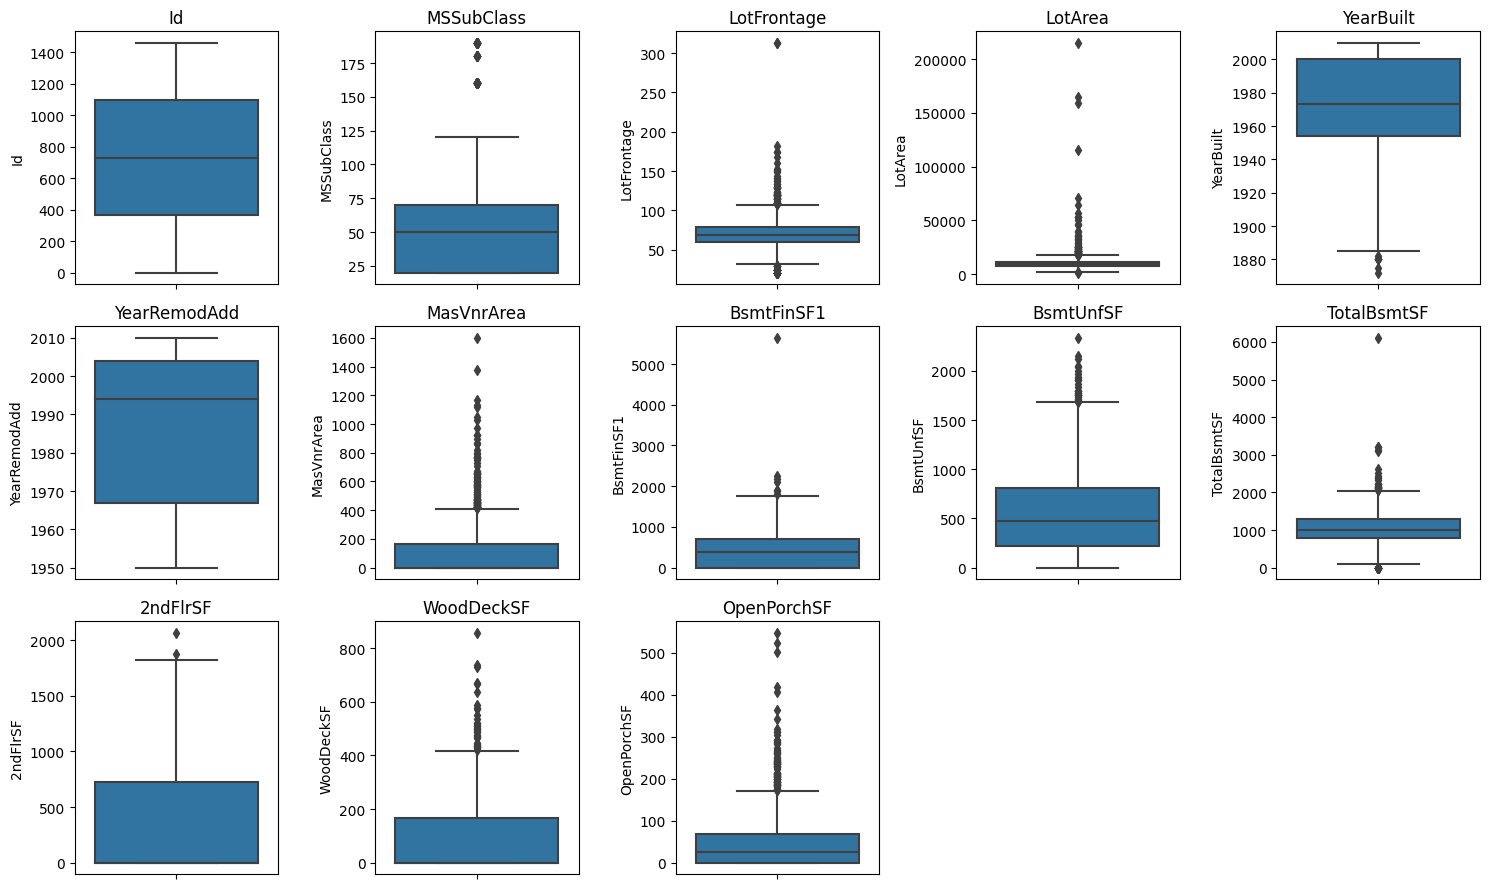

In [35]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 9))

# Vẽ boxplot cho từng cột trong columns_with_many_uniques
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = col, data = df[columns_with_many_uniques].dropna())
    plt.title(col)

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

In [36]:
num_df = num_df.drop(num_df[num_df['LotFrontage'] > 200].index)
num_df = num_df.drop(num_df[num_df['LotArea'] > 100000].index)
num_df = num_df.drop(num_df[num_df['BsmtFinSF1'] > 4000].index)
num_df = num_df.drop(num_df[num_df['TotalBsmtSF'] > 4000].index)
num_df = num_df.drop(num_df[num_df['TotRmsAbvGrd'] > 4000].index)

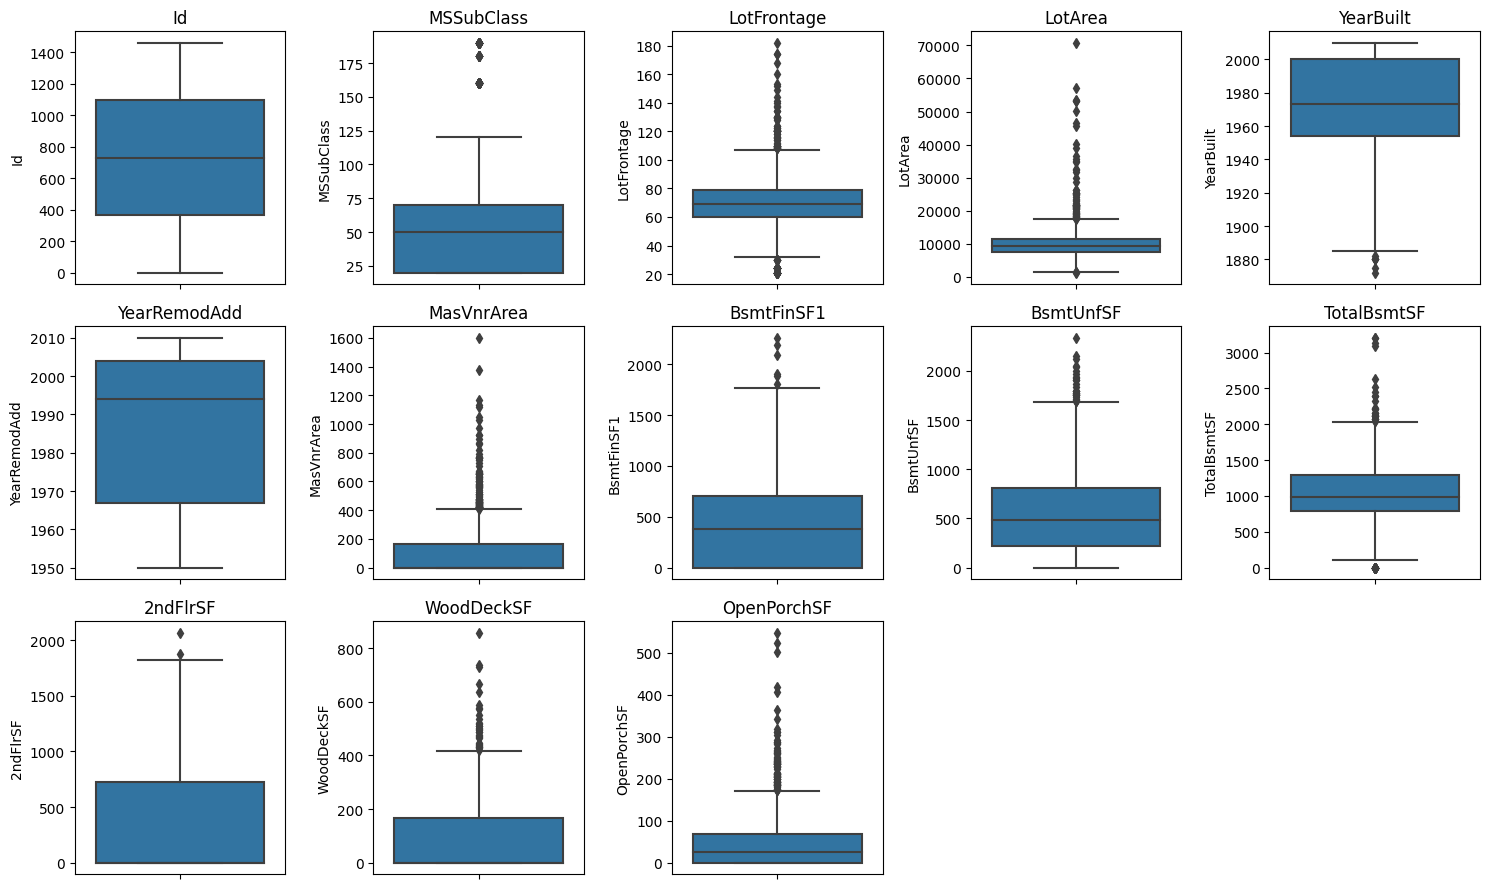

In [37]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 9))

# Vẽ boxplot cho từng cột trong columns_with_many_uniques
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = col, data = num_df[columns_with_many_uniques].dropna())
    plt.title(col)

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig('boxplot1.png')
plt.show()

In [38]:
num_df

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,1,60,65.0,8450,2003,2003,196.0,706,150,856,...,0,2,1,3,1,8,0,2,2,2008
1,2,20,80.0,9600,1976,1976,0.0,978,284,1262,...,1,2,0,3,1,6,1,2,5,2007
2,3,60,68.0,11250,2001,2002,162.0,486,434,920,...,0,2,1,3,1,6,1,2,9,2008
3,4,70,60.0,9550,1915,1970,0.0,216,540,756,...,0,1,0,3,1,7,1,3,2,2006
4,5,60,84.0,14260,2000,2000,350.0,655,490,1145,...,0,2,1,4,1,9,1,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1999,2000,0.0,0,953,953,...,0,2,1,3,1,7,1,2,8,2007
1456,1457,20,85.0,13175,1978,1988,119.0,790,589,1542,...,0,2,0,3,1,7,2,2,2,2010
1457,1458,70,66.0,9042,1941,2006,0.0,275,877,1152,...,0,2,0,4,1,9,2,1,5,2010
1458,1459,20,68.0,9717,1950,1996,0.0,49,0,1078,...,0,1,0,2,1,5,0,1,4,2010


In [39]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
len(categorical_columns)
cat_df = df[categorical_columns]

In [40]:
df = pd.concat([num_df, cat_df], axis=1)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,2.0,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3.0,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4.0,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5.0,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Kiểm tra để biết đâu làm cột cần mã hóa 

In [41]:
def check_and_categorize_columns(df):
    # Kiểm tra các cột có kiểu categorical
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Xác định các cột ordinal và nominal
    ordinal_cols = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
        'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive'
    ]

    nominal_cols = [col for col in categorical_columns if col not in ordinal_cols]

    # In ra kết quả
    print("Categorical columns:", categorical_columns)
    print("\nOrdinal columns:", ordinal_cols)
    print("\nNominal columns:", nominal_cols)

    return ordinal_cols, nominal_cols

# Gọi hàm
ordinal_cols, nominal_cols = check_and_categorize_columns(df)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Ordinal columns: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive']

Nominal columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'F

Tiến hành Encode

In [42]:
from sklearn.preprocessing import LabelEncoder
 

# Cột ordinal (đã loại bỏ PoolQC vì đã xóa trước đó)
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 
                'Functional', 'LandSlope', 'PavedDrive']

# Cột nominal
nominal_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Xử lý cột ordinal
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

df


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,...,2,6,3,Attchd,RFn,5,5,2,WD,Normal
1,2.0,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,...,3,6,5,Attchd,RFn,5,5,2,WD,Normal
2,3.0,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,...,2,6,5,Attchd,RFn,5,5,2,WD,Normal
3,4.0,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,...,2,6,2,Detchd,Unf,5,5,2,WD,Abnorml
4,5.0,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,...,2,6,5,Attchd,RFn,5,5,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,6,2,Attchd,RFn,5,5,2,WD,Normal
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,6,2,Attchd,Fin,5,5,2,WD,Normal
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,6,5,Attchd,Unf,5,5,2,WD,Normal
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,6,2,Attchd,RFn,5,5,2,WD,Normal


In [43]:
# Xử lý cột nominal
df = pd.get_dummies(df, columns=nominal_cols)

# Kiểm tra kết quả
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,...,False,False,False,True,False,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,...,False,False,False,True,False,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,...,False,False,False,True,False,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,...,False,False,False,True,True,False,False,False,False,False
4,5.0,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False


In [44]:
# Kiểm tra kiểu dữ liệu của tất cả các cột trong DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1298
Columns: 224 entries, Id to SaleCondition_Partial
dtypes: bool(185), float64(26), int64(13)
memory usage: 720.0 KB


In [45]:
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Chuẩn hóa dữ liệu

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Giả sử df là DataFrame của bạn

# Danh sách các cột số (bao gồm cả 'Id' lúc này)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tạo một bản sao của các cột số để scaler
numerical_cols_to_scale = numerical_cols.copy()

# Loại bỏ 'Id' khỏi danh sách các cột sẽ được scaler
if 'Id' in numerical_cols_to_scale:
    numerical_cols_to_scale = numerical_cols_to_scale.drop('Id')

# Khởi tạo và áp dụng StandardScaler chỉ cho các cột số (trừ 'Id')
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# In ra vài dòng đầu của DataFrame để kiểm tra
print(df.head())

    Id  MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
0  1.0    0.073836    -0.223516 -0.292989   1.049501      0.880128   
1  2.0   -0.874133     0.525544 -0.082066   0.156499     -0.428117   
2  3.0    0.073836    -0.073704  0.220563   0.983353      0.831675   
3  4.0    0.310828    -0.473203 -0.091236  -1.861023     -0.718838   
4  5.0    0.073836     0.725293  0.772632   0.950278      0.734768   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLw  \
0    0.520741    0.616203  -0.945995    -0.471071  ...           False   
1   -0.570040    1.242232  -0.642892     0.501913  ...           False   
2    0.331524    0.109855  -0.303599    -0.317694  ...           False   
3   -0.570040   -0.511571  -0.063831    -0.710722  ...           False   
4    1.377783    0.498822  -0.176929     0.221521  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False         True                  False

Lưu lại 

In [47]:
df[numerical_cols]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive
0,1.0,0.073836,-0.223516,-0.292989,1.049501,0.880128,0.520741,0.616203,-0.945995,-0.471071,...,-0.566939,0.325405,0.591905,-0.884658,-0.409369,0.255978,-0.075117,0.315602,0.295349,0.289745
1,2.0,-0.874133,0.525544,-0.082066,0.156499,-0.428117,-0.570040,1.242232,-0.642892,0.501913,...,-0.566939,0.325405,-1.124444,-0.884658,0.795629,0.255978,1.638498,0.315602,0.295349,0.289745
2,3.0,0.073836,-0.073704,0.220563,0.983353,0.831675,0.331524,0.109855,-0.303599,-0.317694,...,-0.566939,0.325405,-0.266269,-0.884658,-0.409369,0.255978,1.638498,0.315602,0.295349,0.289745
3,4.0,0.310828,-0.473203,-0.091236,-1.861023,-0.718838,-0.570040,-0.511571,-0.063831,-0.710722,...,0.997770,-2.834848,0.591905,0.265476,-0.409369,0.255978,-0.931925,0.315602,0.295349,0.289745
4,5.0,0.073836,0.725293,0.772632,0.950278,0.734768,1.377783,0.498822,-0.176929,0.221521,...,-0.566939,0.325405,-1.982619,-0.884658,-0.409369,0.255978,1.638498,0.315602,0.295349,0.289745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.566939,0.325405,-1.124444,1.415610,0.795629,0.255978,-0.931925,0.315602,0.295349,0.289745
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.997770,0.325405,-1.124444,-0.884658,0.795629,0.255978,-0.931925,0.315602,0.295349,0.289745
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.566939,0.325405,-1.124444,1.415610,-0.409369,0.255978,1.638498,0.315602,0.295349,0.289745
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.566939,0.325405,-1.124444,-0.884658,-0.409369,0.255978,-0.931925,0.315602,0.295349,0.289745


In [48]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive
count,1454.000000,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,1.454000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,730.872765,2.687748e-17,-2.834352e-16,-3.237514e-17,3.393892e-15,4.104924e-15,4.886814e-18,-6.597199e-17,2.443407e-17,-2.272368e-16,...,-1.362685e-16,-7.421765e-17,4.380058e-17,-2.433366e-18,7.300097e-17,-1.630355e-16,-6.935092e-17,1.545187e-16,2.725369e-16,-1.679022e-16
std,421.724898,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,1.000000,-8.741329e-01,-2.420759e+00,-1.604381e+00,-3.283210e+00,-1.687909e+00,-5.700395e-01,-1.008712e+00,-1.285288e+00,-2.522485e+00,...,-2.131649e+00,-3.888266e+00,-1.982619e+00,-8.846577e-01,-2.819365e+00,-5.870700e+00,-2.645540e+00,-5.249360e+00,-5.935997e+00,-3.739087e+00
25%,367.250000,-8.741329e-01,-4.732026e-01,-4.605810e-01,-5.711316e-01,-8.641991e-01,-5.700395e-01,-1.008712e+00,-7.786097e-01,-6.166593e-01,...,-5.669394e-01,3.254050e-01,-2.662693e-01,-8.846577e-01,-4.093691e-01,2.559776e-01,-9.319249e-01,3.156020e-01,2.953487e-01,2.897448e-01
50%,731.500000,-1.631563e-01,-2.376660e-02,-1.080184e-01,5.727693e-02,4.440463e-01,-5.700395e-01,-1.329613e-01,-1.984176e-01,-1.487403e-01,...,-5.669394e-01,3.254050e-01,5.919055e-01,-8.846577e-01,7.956287e-01,2.559776e-01,-7.511737e-02,3.156020e-01,2.953487e-01,2.897448e-01
75%,1095.750000,3.108282e-01,4.756067e-01,2.748989e-01,9.502785e-01,9.285816e-01,3.412632e-01,6.196549e-01,5.457665e-01,5.750063e-01,...,9.977704e-01,3.254050e-01,5.919055e-01,1.415610e+00,7.956287e-01,2.559776e-01,-7.511737e-02,3.156020e-01,2.953487e-01,2.897448e-01
max,1460.000000,3.154735e+00,5.619152e+00,1.113556e+01,1.281020e+00,1.219303e+00,8.334293e+00,4.192856e+00,3.998645e+00,5.160732e+00,...,9.977704e-01,3.254050e-01,1.450080e+00,1.415610e+00,7.956287e-01,2.559776e-01,1.638498e+00,3.156020e-01,2.953487e-01,2.897448e-01


In [49]:
df.to_csv('train_preprocessed12.csv', index=False)

In [50]:
import joblib

# Lưu scaler ra file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [51]:
pd.read_csv("/kaggle/working/train_preprocessed12.csv")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.073836,-0.223516,-0.292989,1.049501,0.880128,0.520741,0.616203,-0.945995,-0.471071,...,False,False,False,True,False,False,False,False,True,False
1,2.0,-0.874133,0.525544,-0.082066,0.156499,-0.428117,-0.570040,1.242232,-0.642892,0.501913,...,False,False,False,True,False,False,False,False,True,False
2,3.0,0.073836,-0.073704,0.220563,0.983353,0.831675,0.331524,0.109855,-0.303599,-0.317694,...,False,False,False,True,False,False,False,False,True,False
3,4.0,0.310828,-0.473203,-0.091236,-1.861023,-0.718838,-0.570040,-0.511571,-0.063831,-0.710722,...,False,False,False,True,True,False,False,False,False,False
4,5.0,0.073836,0.725293,0.772632,0.950278,0.734768,1.377783,0.498822,-0.176929,0.221521,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,True,False


In [52]:
import pandas as pd

# Giả sử bạn đã load file gốc train.csv
train_df_original = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

# Giả sử DataFrame đã tiền xử lý của bạn là X
# (X chứa các đặc trưng đã được xử lý, không bao gồm 'SalePrice' và 'Id' nếu bạn đã loại bỏ chúng)
X = pd.read_csv('/kaggle/working/train_preprocessed12.csv')
# Lấy cột 'SalePrice' từ file gốc
sale_price = train_df_original[['Id', 'SalePrice']]

# Merge 'SalePrice' vào DataFrame đã tiền xử lý X dựa trên 'Id'
# Lưu ý: Đảm bảo 'Id' vẫn còn là một cột trong X hoặc bạn có cách khác để liên kết
# Nếu bạn đã loại bỏ 'Id' trong quá trình tiền xử lý và không giữ lại thông tin liên kết,
# việc merge trực tiếp có thể không chính xác trừ khi thứ tự các hàng được đảm bảo.

# Cách 1: Nếu 'Id' vẫn còn trong X (nên là trường hợp tốt nhất)
X_merged = pd.merge(X, sale_price, on='Id', how='left')

# Cách 2: Nếu bạn đã loại bỏ 'Id' nhưng thứ tự các hàng trong X đảm bảo giống với train_df_original (rủi ro cao)
# X_merged = pd.concat([X.reset_index(drop=True), sale_price['SalePrice']], axis=1)

print("DataFrame huấn luyện đã merge với SalePrice:")
print(X_merged.head())

DataFrame huấn luyện đã merge với SalePrice:
    Id  MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
0  1.0    0.073836    -0.223516 -0.292989   1.049501      0.880128   
1  2.0   -0.874133     0.525544 -0.082066   0.156499     -0.428117   
2  3.0    0.073836    -0.073704  0.220563   0.983353      0.831675   
3  4.0    0.310828    -0.473203 -0.091236  -1.861023     -0.718838   
4  5.0    0.073836     0.725293  0.772632   0.950278      0.734768   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  SaleType_New  \
0    0.520741    0.616203  -0.945995    -0.471071  ...         False   
1   -0.570040    1.242232  -0.642892     0.501913  ...         False   
2    0.331524    0.109855  -0.303599    -0.317694  ...         False   
3   -0.570040   -0.511571  -0.063831    -0.710722  ...         False   
4    1.377783    0.498822  -0.176929     0.221521  ...         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         False        

In [53]:
X_merged.to_csv('train_preprocessed13.csv', index=False)

In [54]:
df1 = pd.read_csv('/kaggle/working/train_preprocessed13.csv')
print(df1['SalePrice'])

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455         NaN
1456         NaN
1457         NaN
1458         NaN
1459         NaN
Name: SalePrice, Length: 1460, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
